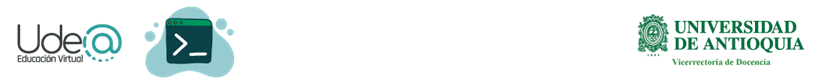

**Laboratorio Tratamiento de Señales III** *Práctica* 04

**Laboratorio: Filtrado de Señales**

*   Mateo Muñoz Arroyave
CC 1036676919

*   David Esteban Londoño Patiño
CC 1020465536



**Docentes:**

*   Hernán Felipe García Arias, PhD.
*   Pablo Alejandro Alvarado Duran, PhD.

**Facultad de Ingeniería**

**Universidad de Antioquia**

- En este **cuaderno**, estudiaremos varias clases de filtros que se incluyen en la categoría de filtros IIR digitales (Filtros de respuesta infinita al impulso).

- Los filtros IIR a menudo se basan en
 filtros analógicos y se han convertido en sus equivalentes digitales. Se utilizan comúnmente en el procesamiento de audio digital, así como en sistemas de control y otras aplicaciones.

- Comenzaremos con algunos antecedentes, por ejemplo,
 cómo describir un filtro en particular y qué es importante sobre el comportamiento de un filtro. Luego veremos algunos aspectos matemáticos y finalmente cómo implementar esto en el código.

- Entonces, ¿qué hace realmente un filtro? Un filtro
 normalmente está diseñado para eliminar frecuencias particulares de una señal, ya sea en alguna forma de ecualizador de audio o en un sistema de control.

## Frecuencia de Nyquist

Antes de empezar recordemos un poco el concepto de la Frecuencia de Nyquist, la cual nos indica la frecuencia sugerida para muestrear una señal, con base en su frecuencia máxima.

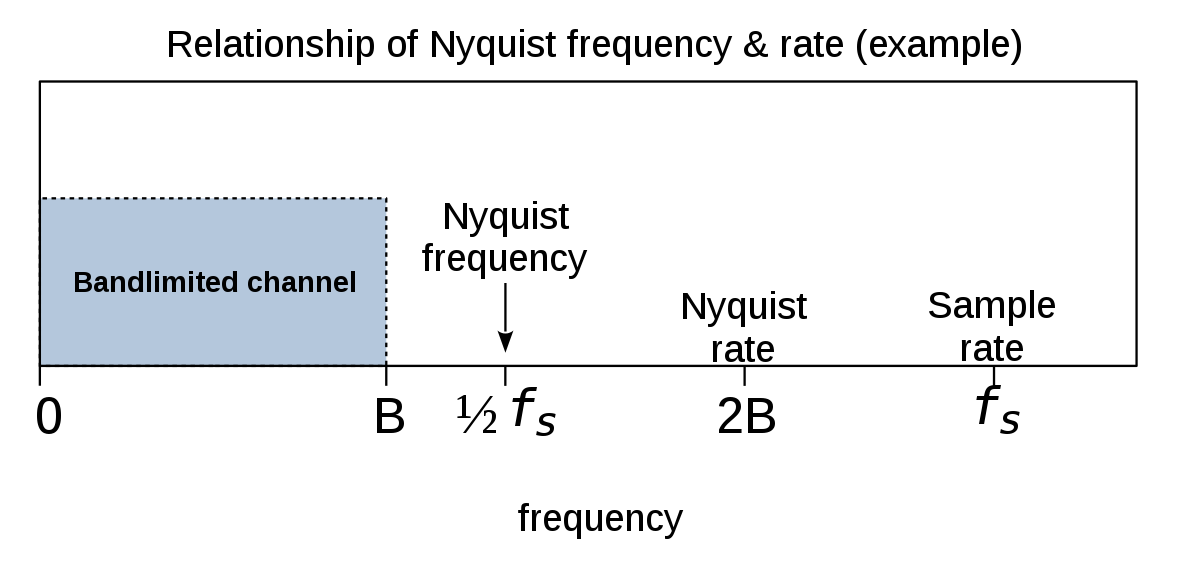

# Ejemplo interactivo de filtros

- El siguiente código muestra el uso de
 filtros usando ``Scipy``.

- Ejecute el siguinete código y navegue sobre los
 controles y la salidas se graficarán en las celdas.

- Puedes arrastrar los controles deslizantes y cambiar
 el tipo y la clase del filtro para explorar cómo estos parámetros afectan el procesamiento que hace el filtro a una señal de entrada.

In [ ]:
from ipywidgets import interact
import matplotlib.pylab as plt
import numpy as np
import scipy.signal
%matplotlib inline

In [ ]:
@interact(cutoff=(0.005, 9.9, 1), bandType=["lowpass", "highpass"],
          filterClass=["butterworth",
                       "chebyshev1",
                       "chebyshev2",
                       "elliptic",
                       "bessel"], order=(1, 10, 1))

def filterBuffer(cutoff, bandType, filterClass, order):
    # Construimos una señal de prueba
    NUM_SAMPLES = 200
    SAMPLE_RATE = 44100
    sampleRange = np.linspace(0, 1, NUM_SAMPLES)
    f1 = 1e3
    f2 = 11e3
    f3 = 20e3
    buffer = np.sin(sampleRange*2*np.pi*f1) + \
             np.sin(sampleRange*2*np.pi*f2) + \
             np.sin(sampleRange*2*np.pi*f3)

    plt.figure(figsize=(15, 3))

    # Graficamos la señal de entrada
    plt.subplot(1, 3, 1)
    plt.plot(sampleRange, buffer)
    plt.ylim(bottom=-3, top=3)
    plt.title("Filter Input")
    plt.xlabel("Samples")
    plt.ylabel("Displacement")

    # Calculamos los coeficientes del filtro seleccionado para una determinada
    # frecuencia de corte y aplicamos el filtrado
    if filterClass == "butterworth":
        b, a = scipy.signal.butter(order, cutoff / 10.0, btype=bandType,
                                   analog=False)

    elif filterClass == "chebyshev1":
        b, a = scipy.signal.cheby1(order, 0.5, cutoff / 10.0, btype=bandType,
                                   analog=False)

    elif filterClass == "chebyshev2":
        b, a = scipy.signal.cheby2(order, 20, cutoff / 10.0, btype=bandType,
                                   analog=False)

    elif filterClass == "elliptic":
        b, a = scipy.signal.ellip(order, 0.5, 20, cutoff / 10.0, btype=bandType,
                                  analog=False)

    elif filterClass == "bessel":
        b, a = scipy.signal.bessel(order, cutoff / 10.0, btype=bandType,
                                   analog=False)

    buffer = scipy.signal.lfilter(b, a, buffer)

    # Calculamos la respuesta en frecuencia
    angularFreq, response = scipy.signal.freqz(b, a, worN=8000)
    print(len(angularFreq))
    # Graficamos la señal filtrada y la respuesta en frecuencia
    plt.subplot(1, 3, 2)
    plt.plot(0.5 * SAMPLE_RATE * angularFreq / np.pi, np.abs(response))
    plt.xlim(0, 0.5 * SAMPLE_RATE)
    plt.title("Filter Frequency Response")
    plt.xlabel("Frequency (Hz)")

    plt.subplot(1, 3, 3)
    plt.plot(sampleRange, buffer)
    plt.ylim(bottom=-3, top=3)
    plt.title("Filter Output")
    plt.xlabel("Samples")
    plt.ylabel("Displacement")

    plt.show()

interactive(children=(FloatSlider(value=4.005, description='cutoff', max=9.9, min=0.005, step=1.0), Dropdown(d…

## Responder las siguientes preguntas:

1. ¿Qué cambios nota en la señal de salida al cambiar el tipo de filtro (lowpass y highpass)?

2. ¿Qué frecuencia de corte del filtro **pasa-baja** permite recuperar la componente de la señal con la frecuencia más baja?

2. ¿Qué frecuencia de corte del filtro **pasa-alta** permite recuperar la componente de la señal con la frecuencia más alta?

###1. Podemos observar varios cambios al pasar de pasa-bajas a pasa-altas, donde la señal que estamos graficando son de 1khz, 11khz y 20khz, pero vemos como depende cada filtro de la frecuencia de corte, ademas vemos como la señal se atenua si por ejemplo la frecuencia de corte la seleccionamos en 5khz se podria observar la señal de 1khz perfectamente en pasa-bajas y en pasa-altas podriamos ver mas distorcionada la señal ya que se estarian a pasando las frecuencias de 11khz y 20khz.


###2. La frecuencia de corte puede variar dependiendo del filtro que se utilice pero por lo general la frecuencia de corte para recuperar bien la componente de la señal puede ser de 1khz a 2khz. Ya de 3khz en adelante se empieza a notar mucho ruido.



###3. La frecuencia de corte puede variar dependiendo del filtro como se dijo anteriormente, la recuperacion de la componente en esta señal aplicandole filtro pasa-altas es complicado, si la frecuencia de corte es muy alta pero se puede observar la componente con una frecuencia de corte de 1Khz a 3Khz.

## Frecuencia de corte y bandas
- Una de las características clave de un filtro es su **frecuencia de corte**. Esta se ubica en un punto intermedio entre la **banda de paso** y la **banda de rechazo** del filtro. La atenuación del filtro en la frecuencia de corte es $-3dB$.

- Debido a que es difícil producir un filtro con una transición pronunciada entre la banda de paso y la banda de rechazo, hay una pendiente en esta región a medida que las frecuencias se atenúan conforme se acercan a la banda de rechazo.

- La ubicación de las bandas de paso o bandas de parada, determinan el tipo de filtro:

 - **Paso bajo (o corte alto):** la banda de paso está por debajo del corte, la banda de rechazo está por encima.
 - **Paso alto (o corte bajo):** la banda de rechazo está por debajo del corte, la banda de paso está por encima.
 - **Paso de banda:** la banda de paso está entre dos frecuencias de corte, siendo la banda de rechazo todo lo que está por encima y por debajo de este rango.

<!--
## Retardo de grupo y retardo de fase
Un filtro puede impartir un retraso de tiempo en la amplitud de la señal que está procesando, y el tamaño de este retraso puede depender de la frecuencia de la señal. Esta característica se conoce como retardo de grupo.

De manera similar, un filtro también puede impartir un retraso de tiempo en la fase de la señal que está procesando, donde el tamaño de este retraso también puede depender de la frecuencia de la señal. Esta característica se conoce como retardo de fase.
-->

## FIR frente a IIR
- Los algoritmos de filtrado se pueden implementar como respuesta finita al impulso (**FIR**) o respuesta infinita al impulso (**IIR**).

- Los filtros FIR son computacionalmente muy costosos, pero generalmente superan a los diseños de filtros IIR o analógicos, ya que pueden lograr una atenuación muy aguda. Además, son de fase lineal.

- Los filtros IIR son mucho más eficientes computacionalmente y, se basan en diseños de filtros analógicos. No son de fase lineal y no pueden lograr una caída brusca de la forma en que lo hacen los filtros FIR.

## Tipos de Filtros
La clase de un filtro determina varias propiedades:
- La ondulación en las bandas de paso o de rechazo
- La pendiente de la transición entre la banda de paso y la banda de parada.

Se debe tener en cuenta que la clase de un filtro es independiente de su orden o frecuencia de corte. Algunas clases de filtro de uso común incluyen:

- **Butterworth:** Logra la atenuación más pronunciada sin introducir ondulación de banda de paso o banda de parada.

- **Chebyshev:** Logra una atenuación mucho más pronunciada que el filtro Butterworth a costa de introducir algo de ondulación de banda de paso o de banda de parada, según la configuración.

- **Elíptica:** caída aún más pronunciada que la del filtro Chebyshev, a costa de introducir ondulación tanto en las bandas de paso como en las bandas de parada.

- **Bessel:** caída muy lenta, pero respuesta de fase lineal y retraso de grupo plano en la banda de paso que puede ser importante para ciertas aplicaciones

## Orden de un filtro
- Un filtro de primer orden sería la implementación más simple de una clase de filtro, requiriendo la menor cantidad de componentes (o cálculos si es digital).

- Un orden bajo representa menos cálculos, pero tiene como consecuencia generar un filtro con bajo rendimiento (ondulación o velocidad de transición entre banda de paso y banda de parada).

- Un filtro de orden superior necesitaría más componentes o cálculos, pero lograría una caída más pronunciada.

## Diagramas de Bode
- Los diagramas de Bode combinan muy bien varias de las características que acabamos de discutir en una representación visual de un filtro.

- Un diagrama de Bode es simplemente un par de gráficos que describen lo que hace el filtro a las señales de diferentes frecuencias en términos de su amplitud (el gráfico superior de la siguiente figura) y su fase (el gráfico inferior de la siguiente figura).

- El aspecto de fase de la figura no es tan importante en este momento (es decir, útil en sistemas de control dinámico PID, etc.). Por ahora solo necesitas saber que un filtro es capaz de cambiar la fase de algunas frecuencias más o menos que otras frecuencias, y que esto puede ser importante en algunas aplicaciones de ingeniería.

A continuación se muestra un ejemplo que usa ``scipy`` para crear un diagrama de Bode de filtros Butterworth y Chebyshev de tercer orden con una frecuencia de corte de $1 kHz$.

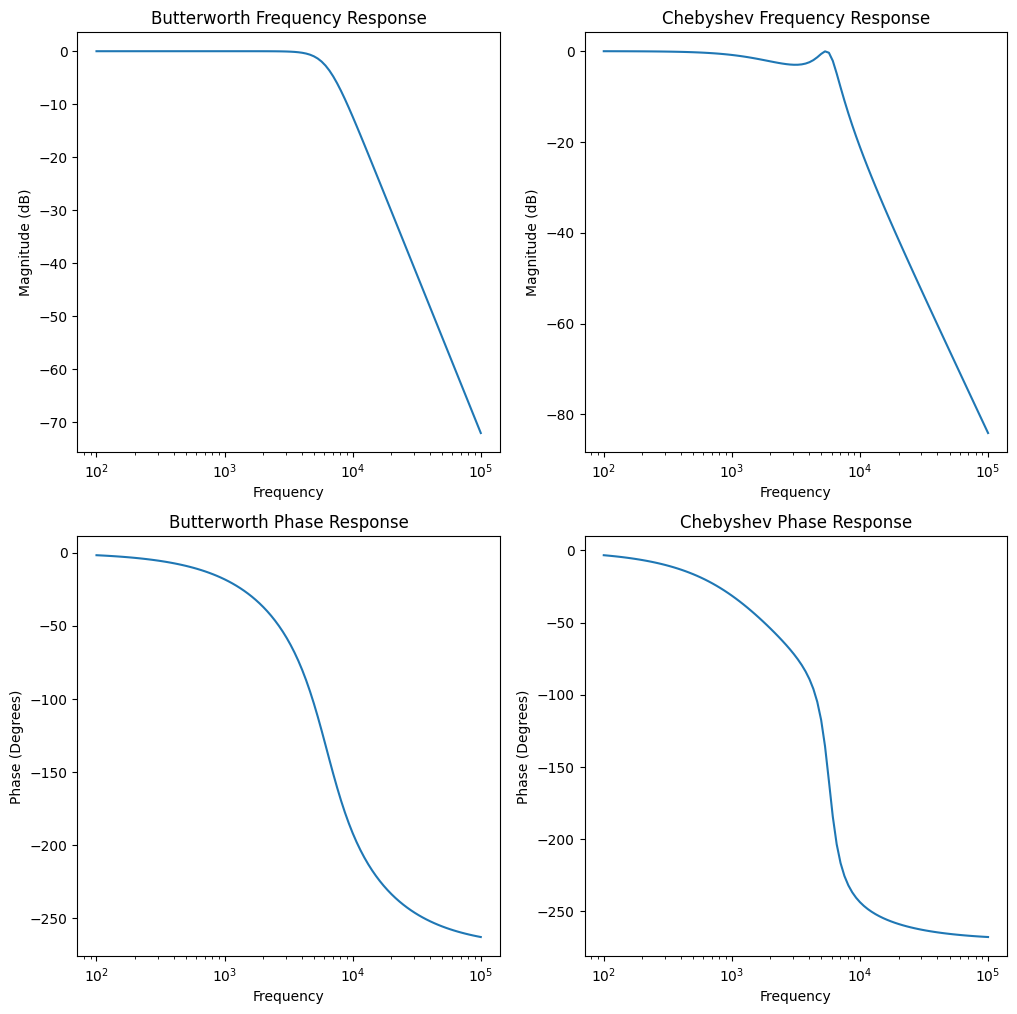

In [ ]:
plt.figure(figsize=(12, 12))

# Butterworth
b, a = scipy.signal.butter(3, 1000 * 2 * scipy.pi, btype="lowpass", analog=True)
angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

plt.subplot(2, 2, 1)
plt.semilogx(angularFreq, freqResponse)
plt.title("Butterworth Frequency Response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude (dB)")

plt.subplot(2, 2, 3)
plt.semilogx(angularFreq, phaseResponse)
plt.title("Butterworth Phase Response")
plt.xlabel("Frequency")
plt.ylabel("Phase (Degrees)")

# Chebyshev
b, a = scipy.signal.cheby1(3, 3, 1000 * 2 * scipy.pi, btype="lowpass", analog=True)
angularFreq, freqResponse, phaseResponse = scipy.signal.bode(scipy.signal.lti(b, a))

plt.subplot(2, 2, 2)
plt.semilogx(angularFreq, freqResponse)
plt.title("Chebyshev Frequency Response")
plt.xlabel("Frequency")
plt.ylabel("Magnitude (dB)")

plt.subplot(2, 2, 4)
plt.semilogx(angularFreq, phaseResponse)
plt.title("Chebyshev Phase Response")
plt.xlabel("Frequency")
plt.ylabel("Phase (Degrees)")

plt.show()

En los diagramas de Bode anteriores, se puede ver la diferencia entre las dos clases de filtros, en particular, la ondulación que está presente en la banda de paso del Chebyshev.

## Comparación de Enfoques de Filtrado

-**filtfilt** es un filtrado de fase cero, que no cambia la señal a medida que se filtra. Dado que la fase es cero en todas las frecuencias, también es de fase lineal. Filtrar hacia atrás en el tiempo requiere que usted prediga el futuro, por lo que no se puede usar en aplicaciones "en línea", solo para el procesamiento fuera de línea de grabaciones de señales.

-**lfilter** es solo filtrado causal hacia adelante en el tiempo, similar a un filtro electrónico de la vida real. Este No puede ser de fase cero (porque indetermenaría la función de transferencia del filtro). Puede ser de fase lineal (FIR simétrico), pero generalmente no lo es. Por lo general, agrega diferentes cantidades de retraso en diferentes frecuencias.



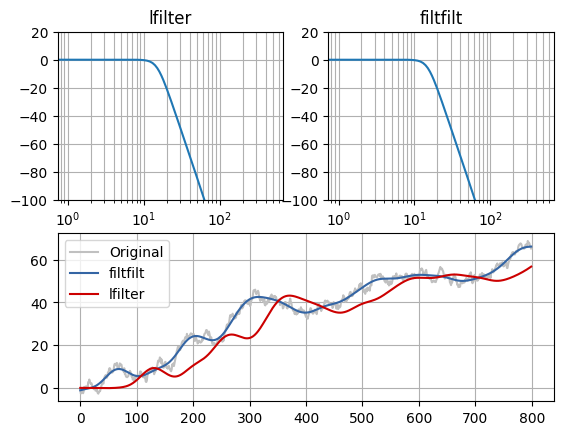

In [ ]:
import numpy as np
from numpy.random import randn
from numpy.fft import rfft
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(4, 0.03, analog=False)

# Show that frequency response is the same
impulse = np.zeros(1000)
impulse[500] = 1

# Applies filter forward and backward in time
imp_ff = signal.filtfilt(b, a, impulse)

# Applies filter forward in time twice (for same frequency response)
imp_lf = signal.lfilter(b, a, signal.lfilter(b, a, impulse))

plt.subplot(2, 2, 1)
plt.semilogx(20*np.log10(np.abs(rfft(imp_lf))))
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('lfilter')

plt.subplot(2, 2, 2)
plt.semilogx(20*np.log10(np.abs(rfft(imp_ff))))
plt.ylim(-100, 20)
plt.grid(True, which='both')
plt.title('filtfilt')

sig = np.cumsum(randn(800))  # Brownian noise
sig_ff = signal.filtfilt(b, a, sig)
sig_lf = signal.lfilter(b, a, signal.lfilter(b, a, sig))
plt.subplot(2, 1, 2)
plt.plot(sig, color='silver', label='Original')
plt.plot(sig_ff, color='#3465a4', label='filtfilt')
plt.plot(sig_lf, color='#cc0000', label='lfilter')
plt.grid(True, which='both')
plt.legend(loc="best")

Aunque la magnitud de la respuesta en frecuencia de los filtros es idéntica en la figura anterior (arriba a la izquierda y arriba a la derecha), el paso bajo de fase cero se alinea con la señal original, solo que sin contenido de alta frecuencia, mientras que el filtrado de fase mínima retrasa la señal de manera causal.

## Trabajo de laboratorio:

1. Descargue un archivo de audio de su elección (voz, música, sonidos de pájaros, etc) y carguelo en el notebook. Analice los primeros 5 segundos de grabación, grafique:

 - Forma de onda (serie de tiempo)
 - Transformada de Fourier
 - Espectrograma
 - Reproduzca en el altavoz el sonido cargado

 A partir de esta información describa el contenido de frecuencia de la señal:
 - ¿Cómo se distribuye la energía de la señal en las bandas de frecuencia?

 - ¿Cómo cambia, con respecto al tiempo, la distribución de energía de la señal (ver espectrograma)?

2. A continuación, escoja una frecuencia de corte (Fc) que afecte de manera significativa a la señal, y úsela como parámetro de diseño para un filtro pasa-baja, y luego para un filtro pasa-alta. Para ambos filtros observe la salida (señal filtrada) utilizando de nuevo:

- Forma de onda (serie de tiempo)
- Transformada de Fourier
- Espectrograma
- Reproduzca en el altavoz el sonido filtrado  

 Compare las señales antes y después de ser filtradas. ¿Qué conclusiones puede sacar de esta comparación?

**Nota:** Escoja libremente el tipo de filtro (Butterworth, Chebyshev, Elíptico, y Bessel), garantizando que como **mínimo** sea de orden 6.

## Trabajo de laboratorio
###Punto 1

Descarga de librerías a utilizar en el desarrollo de la práctica.

In [ ]:
import soundfile as sf
import librosa as lr
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp
import librosa
import IPython

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.display import Audio, display
from scipy.signal import find_peaks
from scipy.fft import fft, fftfreq

Descarga de dataset a utilizar en el desarrollo de la práctica.

In [ ]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1JY1uxXspX7GOCRAIZ3cvVHwBFC6chj9A' -O 'Guau.mp3'

--2023-09-10 23:28:02--  https://drive.google.com/uc?export=download&id=1JY1uxXspX7GOCRAIZ3cvVHwBFC6chj9A
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.102, 108.177.125.100, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/72dec83o2gqffqbd438aalloa7k02ku1/1694388450000/08160783725067553876/*/1JY1uxXspX7GOCRAIZ3cvVHwBFC6chj9A?e=download&uuid=4ca5ce63-a620-4e1c-81c3-9191a8703c9f [following]
--2023-09-10 23:28:04--  https://doc-0k-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/72dec83o2gqffqbd438aalloa7k02ku1/1694388450000/08160783725067553876/*/1JY1uxXspX7GOCRAIZ3cvVHwBFC6chj9A?e=download&uuid=4ca5ce63-a620-4e1c-81c3-9191a8703c9f
Resolving doc-0k-ak-docs.googleusercontent.com (doc-0k-ak-docs.googleusercontent.com)... 64.233.189.132, 2

### Toma del Audio y sus primeros 10 segundos

In [ ]:
data, fs = lr.load('Guau.mp3')

data2 = data[0:10*fs]


n=data2.size
time2 = np.linspace(0,(n-1)/fs, n)

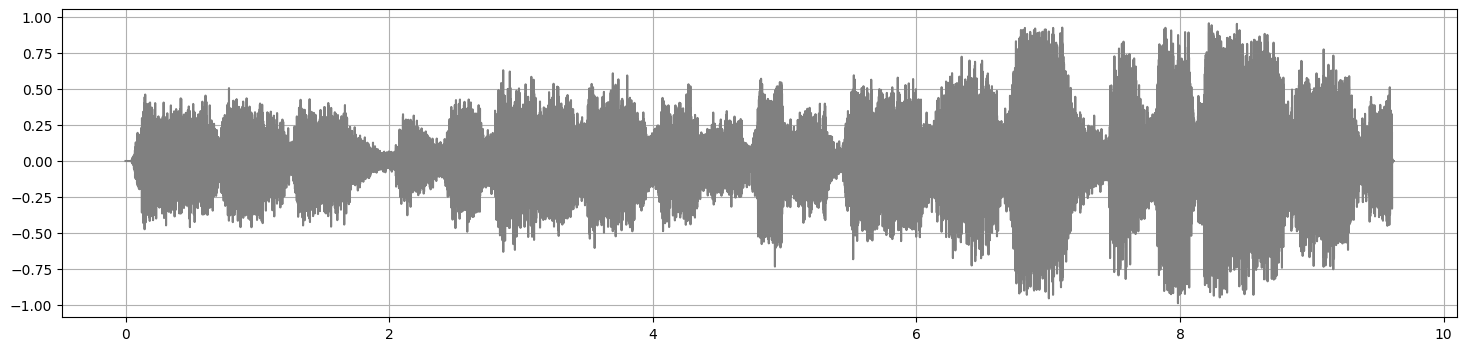

In [ ]:
plt.figure(figsize=(18,4))
plt.plot(time2,data2, 'grey')
plt.grid()
plt.show()

## Reproducción del Audio original

In [ ]:
Audio(data, rate=fs)


###Estandarice la señal de manera que tenga media cero y desviación estándar 1.

Se utilizan las funciones de las librerías numpy y sklearn, para realizar el preprocesado de las señales, se procede entonces a estandarizar la señal, lo cual se corroborá al verificar que la media de la señál es un número muy aproximado a cero y la desviación estándar es 1. Y se grafica la señal estandarizada validando por simple observación la media de la señal centrada en 0.


La media de la señal Estandarizadaes:  -1.2699115e-09
La desviación estándar de la Señal Estandarizada es:  1.0


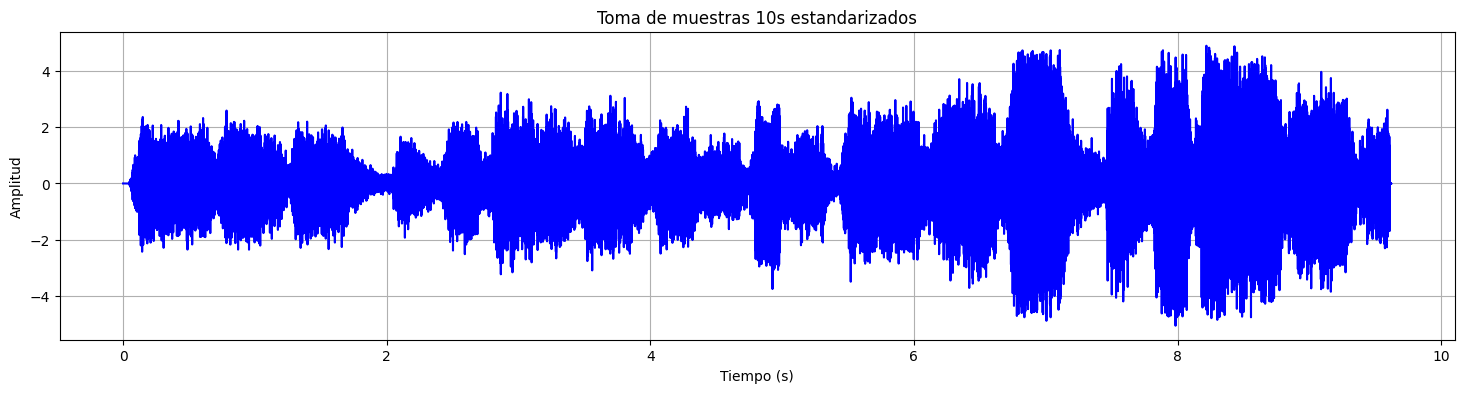

In [ ]:
standardScaler = StandardScaler()
datos_estandarizados= standardScaler.fit_transform(data2.reshape(-1, 1))


media_est = np.mean(datos_estandarizados)
sigma_est = np.std(datos_estandarizados)

print("La media de la señal Estandarizadaes: ", media_est)
print("La desviación estándar de la Señal Estandarizada es: ", sigma_est)

plt.figure(figsize=(18,4))
plt.plot(time2,datos_estandarizados,'b')
plt.title("Toma de muestras 10s estandarizados")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

### Reproducción del Audio estandarizado

In [ ]:
Audio(data2, rate=fs)

###Transformada de Fourier Audio estandarizado original



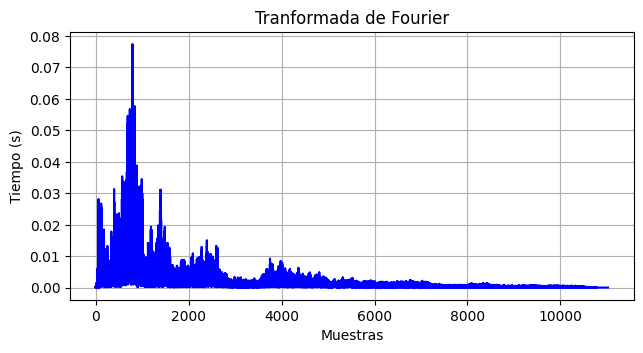

In [ ]:
datos_estandarizados=datos_estandarizados.reshape(data2.shape,)

T = 1./fs

plt.figure(figsize=(16, 16))

plt.subplot(4,2,1)
yf = fft(datos_estandarizados)
N = len(datos_estandarizados)
xf = fftfreq(N, T)[0:N//2]
yf_abs = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf_abs, color='b')
plt.ylabel('Tiempo (s)')
plt.xlabel('Muestras')
plt.title('Tranformada de Fourier')
plt.grid()

### Transformada de tiempo corto de Fourier (STFT) Audio estandarizado original

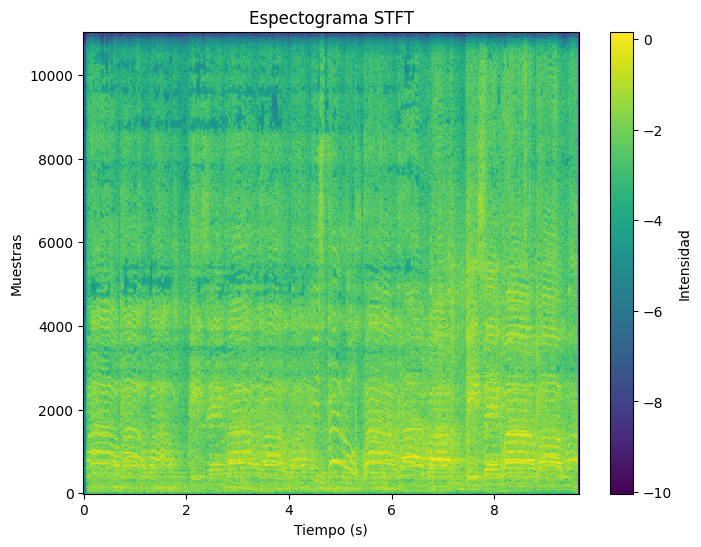

In [ ]:
datos_estandarizados=datos_estandarizados.reshape(data2.shape,)

plt.figure(figsize=[8, 6])

f, t, Zxx = sp.signal.stft(datos_estandarizados, fs, nperseg=1102)  # Generar STFT
plt.pcolormesh(t, f, np.log10(np.abs(Zxx)))
plt.colorbar(label='Intensidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Muestras')
plt.title('Espectograma STFT')
plt.show()

A partir de esta información describa el contenido de frecuencia de la señal:

- ¿Cómo se distribuye la energía de la señal en las bandas de frecuencia?

- ¿Cómo cambia, con respecto al tiempo, la distribución de energía de la señal (ver espectrograma)?

Respuestas:

- En la grafica de la transformada de Fourier se puede observar como la mayor parte de su energia se concentra en la banda de 0 a 2500 aproximadamente, nos quiere decir que las frecuencias mas importantes son las bajas y medias, donde se compone de la voz o musica.

- En el espectograma se puede ver un cambio en la distribución de la energia donde la parte mas intensa se concentra en todo el tiempo pero de 0 a 2500
aproximadamente, ahroa en los ultimos segundos apartir del 7 se pued enotar como hay una instensidad significativa en todas la bandas, resaltando las mas bajas que son mucho mas intensas que las altas.

##Filtros
###Punto 2

### Pasa-bajas
se utiliza una frecuencia de corte de 1000Hz, un filtro Butterworth de orden 6 y se filtra el audio escogido estandarizado.

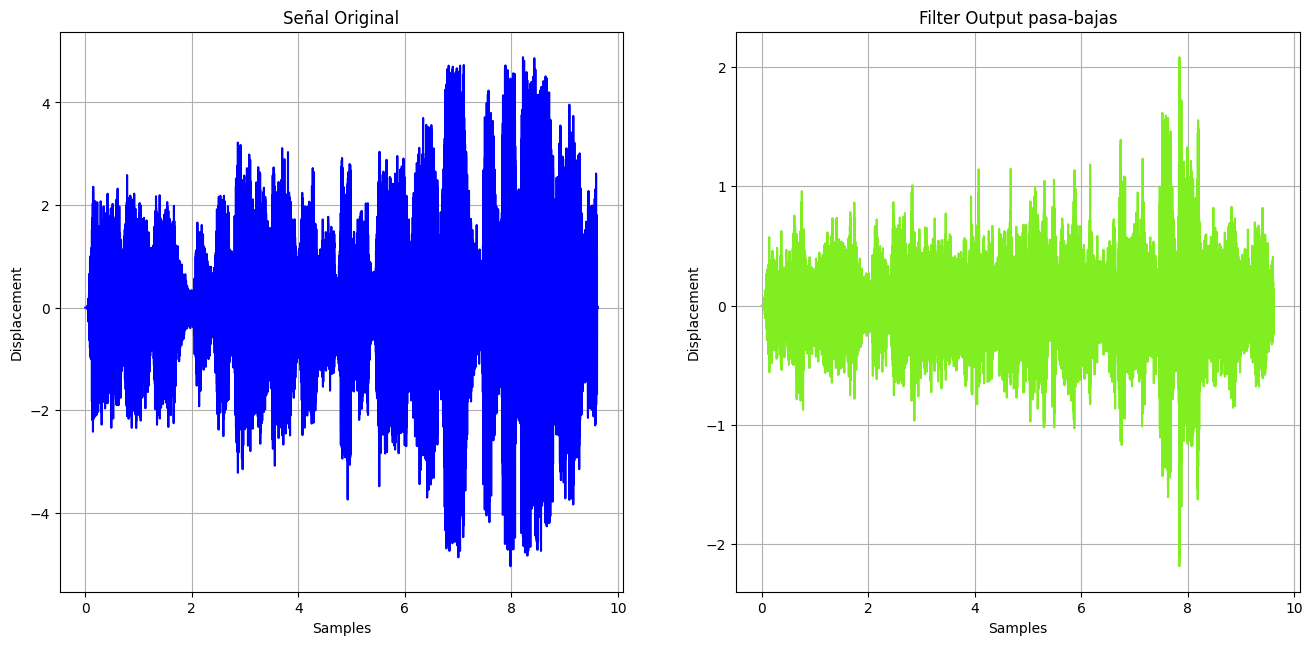

In [ ]:
fc = 1000
order = 6
b, a = scipy.signal.butter(order, fc/fs, btype='low',analog=False)

buffer = scipy.signal.lfilter(b, a, datos_estandarizados)

sampleRange = np.arange(0,float(len(buffer))/fs,1.0/fs)

#Grafica señal original
plt.figure(figsize=(16, 16))
plt.subplot(2,2,1)
plt.plot(time2, datos_estandarizados, color='b')

plt.title("Señal Original")
plt.xlabel("Samples")
plt.ylabel("Displacement")
plt.grid()

#Grafica señal filtrada
plt.subplot(2,2,2)
plt.plot(sampleRange, buffer, color='#80EE20')

plt.title("Filter Output pasa-bajas")
plt.xlabel("Samples")
plt.ylabel("Displacement")
plt.grid()
plt.show()


###Se estandarizan los datos del audio filtrado y se hace la Transformada de Fourier

La media de la señal Estandarizadaes:  -9.99745495540393e-18
La desviación estándar de la Señal Estandarizada es:  1.0


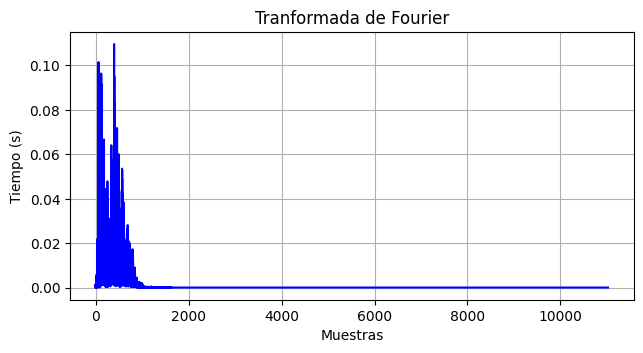

In [ ]:
standardScaler = StandardScaler()
datos_estandarizados1= standardScaler.fit_transform(buffer.reshape(-1, 1))

media_est = np.mean(datos_estandarizados1)
sigma_est = np.std(datos_estandarizados1)

print("La media de la señal Estandarizadaes: ", media_est)
print("La desviación estándar de la Señal Estandarizada es: ", sigma_est)

datos_estandarizados1=datos_estandarizados1.reshape(buffer.shape,)

T = 1./fs

plt.figure(figsize=(16, 16))

plt.subplot(4,2,1)
yf = fft(datos_estandarizados1)
N = len(datos_estandarizados1)
xf = fftfreq(N, T)[0:N//2]
yf_abs = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf_abs, color='b')
plt.ylabel('Tiempo (s)')
plt.xlabel('Muestras')
plt.title('Tranformada de Fourier')
plt.grid()
plt.show()

Se puede observar como la energia esta concentrada entre 0 a 1000 que es la frecuencia de corte elegida.

###Espectograma Audio filtrado

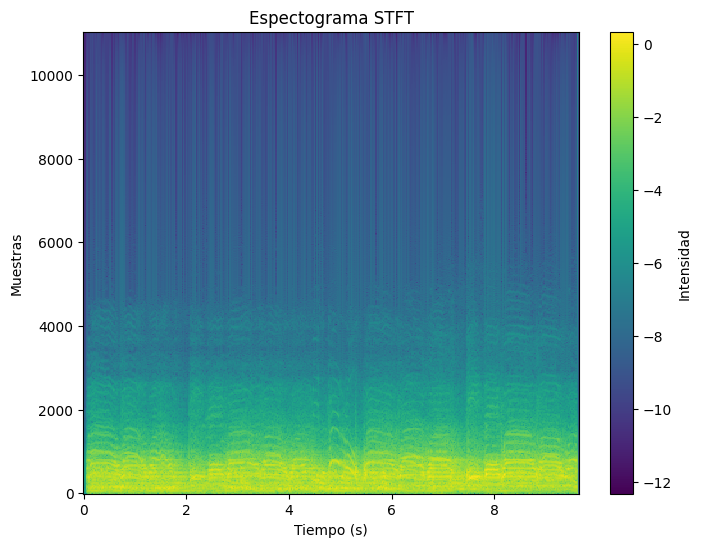

In [ ]:
datos_estandarizados1=datos_estandarizados1.reshape(buffer.shape,)

plt.figure(figsize=[8, 6])

f, t, Zxx = sp.signal.stft(datos_estandarizados1, fs, nperseg=1102)  # Generar STFT
plt.pcolormesh(t, f, np.log10(np.abs(Zxx)))
plt.colorbar(label='Intensidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Muestras')
plt.title('Espectograma STFT')
plt.show()

####En esta grafica del espectograma podemos ver y confirmar donde esta la mayor intensidad, donde se puede notar que apartir de 0 a 1000Hz es donde esta su mayor intensidad y se desvanece, pero esto se da por el funcionamiento del filtro Butterworth.

##Reproducción del Audio filtrado

In [ ]:
Audio(buffer.reshape(-1,), rate=fs)

### Pasa-altas
se utiliza una frecuencia de corte de 6000Hz, un filtro Butterworth de orden 6 y se filtra el audio escogido.

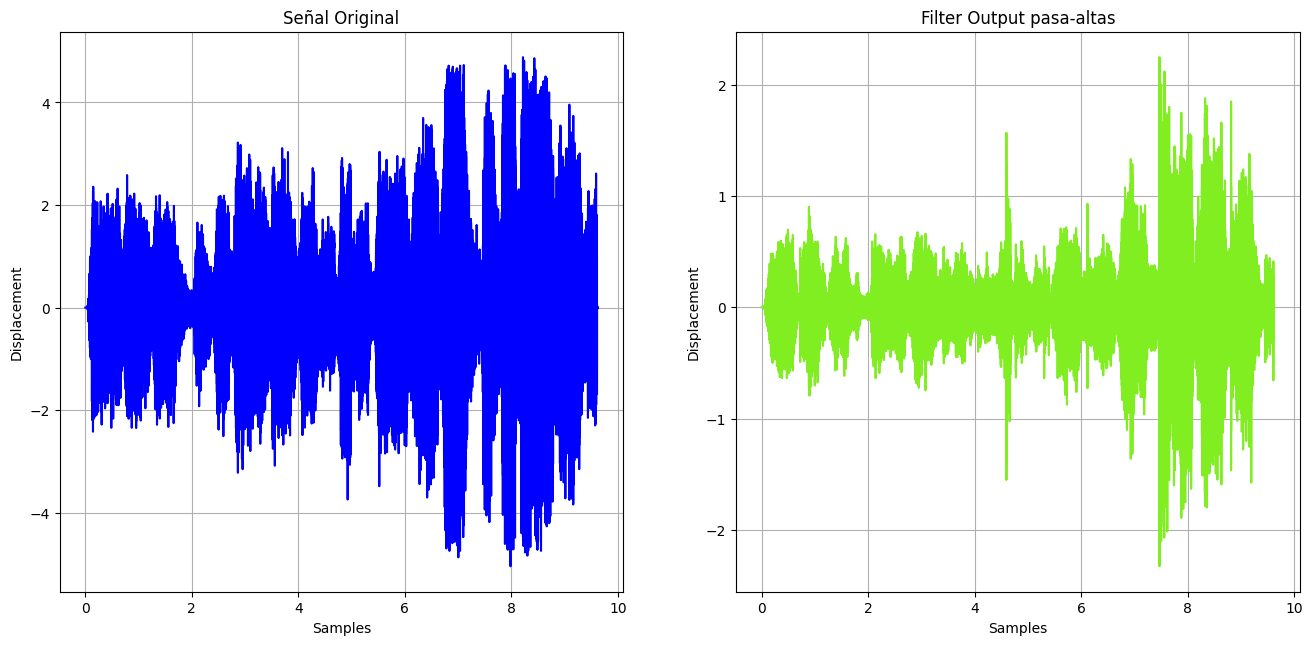

In [ ]:
fc = 6000
order = 6
b, a = scipy.signal.butter(order, fc/fs, btype='high',analog=False)

buffer_h = scipy.signal.lfilter(b, a, datos_estandarizados)

sampleRange = np.arange(0,float(len(buffer_h))/fs,1.0/fs)

#Grafica señal original
plt.figure(figsize=(16, 16))
plt.subplot(2,2,1)
plt.plot(time2, datos_estandarizados, color='b')

plt.title("Señal Original")
plt.xlabel("Samples")
plt.ylabel("Displacement")
plt.grid()

#Grafica señal filtrada
plt.subplot(2,2,2)
plt.plot(sampleRange, buffer_h, color='#80EE20')

plt.title("Filter Output pasa-altas")
plt.xlabel("Samples")
plt.ylabel("Displacement")
plt.grid()
plt.show()


###Se estandarizan de nuevo los datos del audio filtrado y se hace la Transformada de Fourier

La media de la señal Estandarizadaes:  2.0932694630242735e-17
La desviación estándar de la Señal Estandarizada es:  1.0


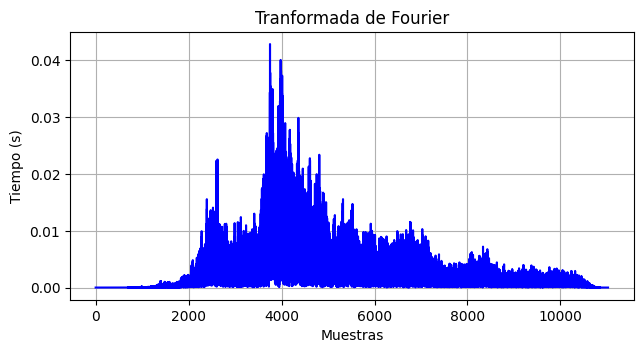

In [ ]:
standardScaler = StandardScaler()
datos_estandarizados2= standardScaler.fit_transform(buffer_h.reshape(-1, 1))

media_est = np.mean(datos_estandarizados2)
sigma_est = np.std(datos_estandarizados2)

print("La media de la señal Estandarizadaes: ", media_est)
print("La desviación estándar de la Señal Estandarizada es: ", sigma_est)

datos_estandarizados2=datos_estandarizados2.reshape(buffer_h.shape,)

T = 1./fs

plt.figure(figsize=(16, 16))

plt.subplot(4,2,1)
yf = fft(datos_estandarizados2)
N = len(datos_estandarizados2)
xf = fftfreq(N, T)[0:N//2]
yf_abs = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, yf_abs, color='b')
plt.ylabel('Tiempo (s)')
plt.xlabel('Muestras')
plt.title('Tranformada de Fourier')
plt.grid()
plt.show()

###Espectograma Audio filtrado

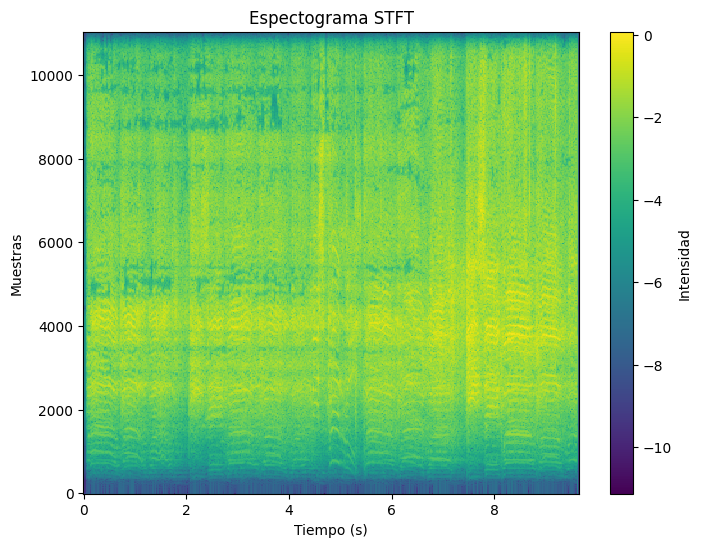

In [ ]:
plt.figure(figsize=[8, 6])

f, t, Zxx = sp.signal.stft(datos_estandarizados2, fs, nperseg=1102)  # Generar STFT
plt.pcolormesh(t, f, np.log10(np.abs(Zxx)))
plt.colorbar(label='Intensidad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Muestras')
plt.title('Espectograma STFT')
plt.show()

### Reproducción del Audio filtrado

In [ ]:
Audio(buffer_h.reshape(-1,), rate=fs)

## Conclusiones

- En nuestro análisis, hemos tomado un fragmento de audio de un podcast de comedia alojado en YouTube. Este fragmento incluye elementos típicos de un podcast, como una introducción cantada, la presencia de voces de fondo y música de acompañamiento. Al aplicar una Transformada de Fourier al audio, observamos patrones interesantes en la distribución de su energía en el dominio de la frecuencia.

- En los primeros segundos del audio, notamos que la mayor parte de su energía está concentrada en el rango de frecuencia de 0 a 2500 Hz. Esta banda abarca las frecuencias fundamentales de las voces humanas y muchos de los sonidos musicales. Sin embargo, a medida que avanzamos en el audio, aproximadamente a partir del segundo 7, la energía se distribuye de manera más uniforme en un rango más amplio de frecuencias. Esto sugiere una mayor complejidad en el sonido a medida que la introducción da paso al contenido principal del podcast.

- Al aplicar dos tipos de filtros uno pasa-bajas y otro pasa-altas, ambos basados en el filtro Butterworth. El filtro pasa-bajas, con una frecuencia de corte adecuada, donde se puede notar mas el ruido y crea un eco en el audio. Además, permite el paso de frecuencias más bajas, lo que se refleja claramente en las gráficas de la Transformada de Fourier y en el espectrograma, donde la energía se concentra en las frecuencias más bajas.

- El filtro pasa-altas mejora significativamente la calidad del audio, reduciendo el ruido y permitiendo que la voz y la música se escuchen de manera más clara. Al observar la Transformada de Fourier y el espectrograma con este filtro, notamos que deja pasar las frecuencias por encima de una cierta banda, dependiendo de la frecuencia de corte especificada. Esto contribuye a una experiencia auditiva más nítida y definida.

- Se puede destacar algo importante en el filtro Butterworth donde tiene sus limitaciones y es adecuado para casos específicos. En el caso del filtro pasa-altas, su precisión puede variar, y permite el paso de frecuencias antes de la frecuencia de corte seleccionada. Esto se debe a la naturaleza del filtro y su diseño para no ser demasiado selectivo. En consecuencia, su elección debe basarse en las necesidades específicas de la aplicación y la naturaleza del contenido de audio ya que su respuesta es suave y no tiene una caida abrupta.

## Lecturas sugeridas

### Videos
[What is Butterworth filter Approximation](https://www.youtube.com/watch?v=evbcE5_IHaM)  
[Problem no.1 on Butterworth Filter Design](https://www.youtube.com/watch?v=CavMvvL6Pno)  
[Digital Filters Part 1](https://www.youtube.com/watch?v=loHy8v9A8LY)  
[Digital Filters Part 2](https://www.youtube.com/watch?v=biOqM5BRTDs)  

### Textos
[The Art of VA Filter Design](https://www.native-instruments.com/fileadmin/ni_media/downloads/pdf/VAFilterDesign_1.1.1.pdf)  
[Butterworth filter](https://en.wikipedia.org/wiki/Butterworth_filter)  
[Important filter classes](https://en.wikipedia.org/wiki/Network_synthesis_filters#Important_filter_classes)

## Referencias

1. P. Prandoni and M. Vetterli, *Signal Processing for Communications*, ser. Communication and information sciences. CRC Press, 2008.